In [1]:
import xfirst

Welcome to JupyROOT 6.28/04


2023-07-13 20:49:15.104398: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Configure

In [2]:
datadir = 'data'
nshowers = 10000

# model and training configuration
epochs = 100
layers = [512, 512, 512, 512]

# cut configuration
cut = xfirst.config.cut.A2

# features
x = xfirst.data.load_depths(datadir, cut).index.to_list()

# target
y = 'Xfirst'

### Load profiles

In [3]:
data = xfirst.data.load_profiles(
  datadir = datadir,
  cut = cut,
  nshowers = nshowers,
  norm = True,
  xfirst = True,
)

### Train the MLP

In [4]:
model = xfirst.models.multilayer_perceptron_regressor(
  input = len(x),
  layers = layers,
  epochs = epochs,
).fit(data, x, y)

+ training the model on ['Edep_35', 'Edep_36', 'Edep_37', 'Edep_38', 'Edep_39', 'Edep_40', 'Edep_41', 'Edep_42', 'Edep_43', 'Edep_44', 'Edep_45', 'Edep_46', 'Edep_47', 'Edep_48', 'Edep_49', 'Edep_50', 'Edep_51', 'Edep_52', 'Edep_53', 'Edep_54', 'Edep_55', 'Edep_56', 'Edep_57', 'Edep_58', 'Edep_59', 'Edep_60', 'Edep_61', 'Edep_62', 'Edep_63', 'Edep_64', 'Edep_65', 'Edep_66', 'Edep_67', 'Edep_68', 'Edep_69', 'Edep_70', 'Edep_71', 'Edep_72', 'Edep_73', 'Edep_74', 'Edep_75', 'Edep_76', 'Edep_77', 'Edep_78', 'Edep_79', 'Edep_80', 'Edep_81', 'Edep_82', 'Edep_83', 'Edep_84', 'Edep_85', 'Edep_86', 'Edep_87', 'Edep_88', 'Edep_89', 'Edep_90', 'Edep_91', 'Edep_92', 'Edep_93', 'Edep_94', 'Edep_95', 'Edep_96', 'Edep_97', 'Edep_98', 'Edep_99'] for target Xfirst
Epoch 1/100
1563/1563 [==============================] - 30s 19ms/step - loss: 455.4256 - val_loss: 339.5421 - lr: 0.0010
Epoch 2/100
1563/1563 [==============================] - 31s 20ms/step - loss: 381.1196 - val_loss: 364.1501 - lr: 0.001

2023-07-13 20:49:35.937206: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


### Validation curve

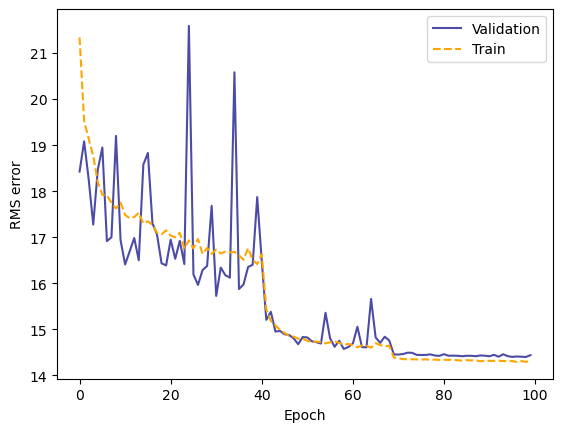

In [5]:
fig = model.draw()

### Compute predictions

+ computing predictions
1563/1563 [==============================] - 6s 4ms/step
+ drawing predictions


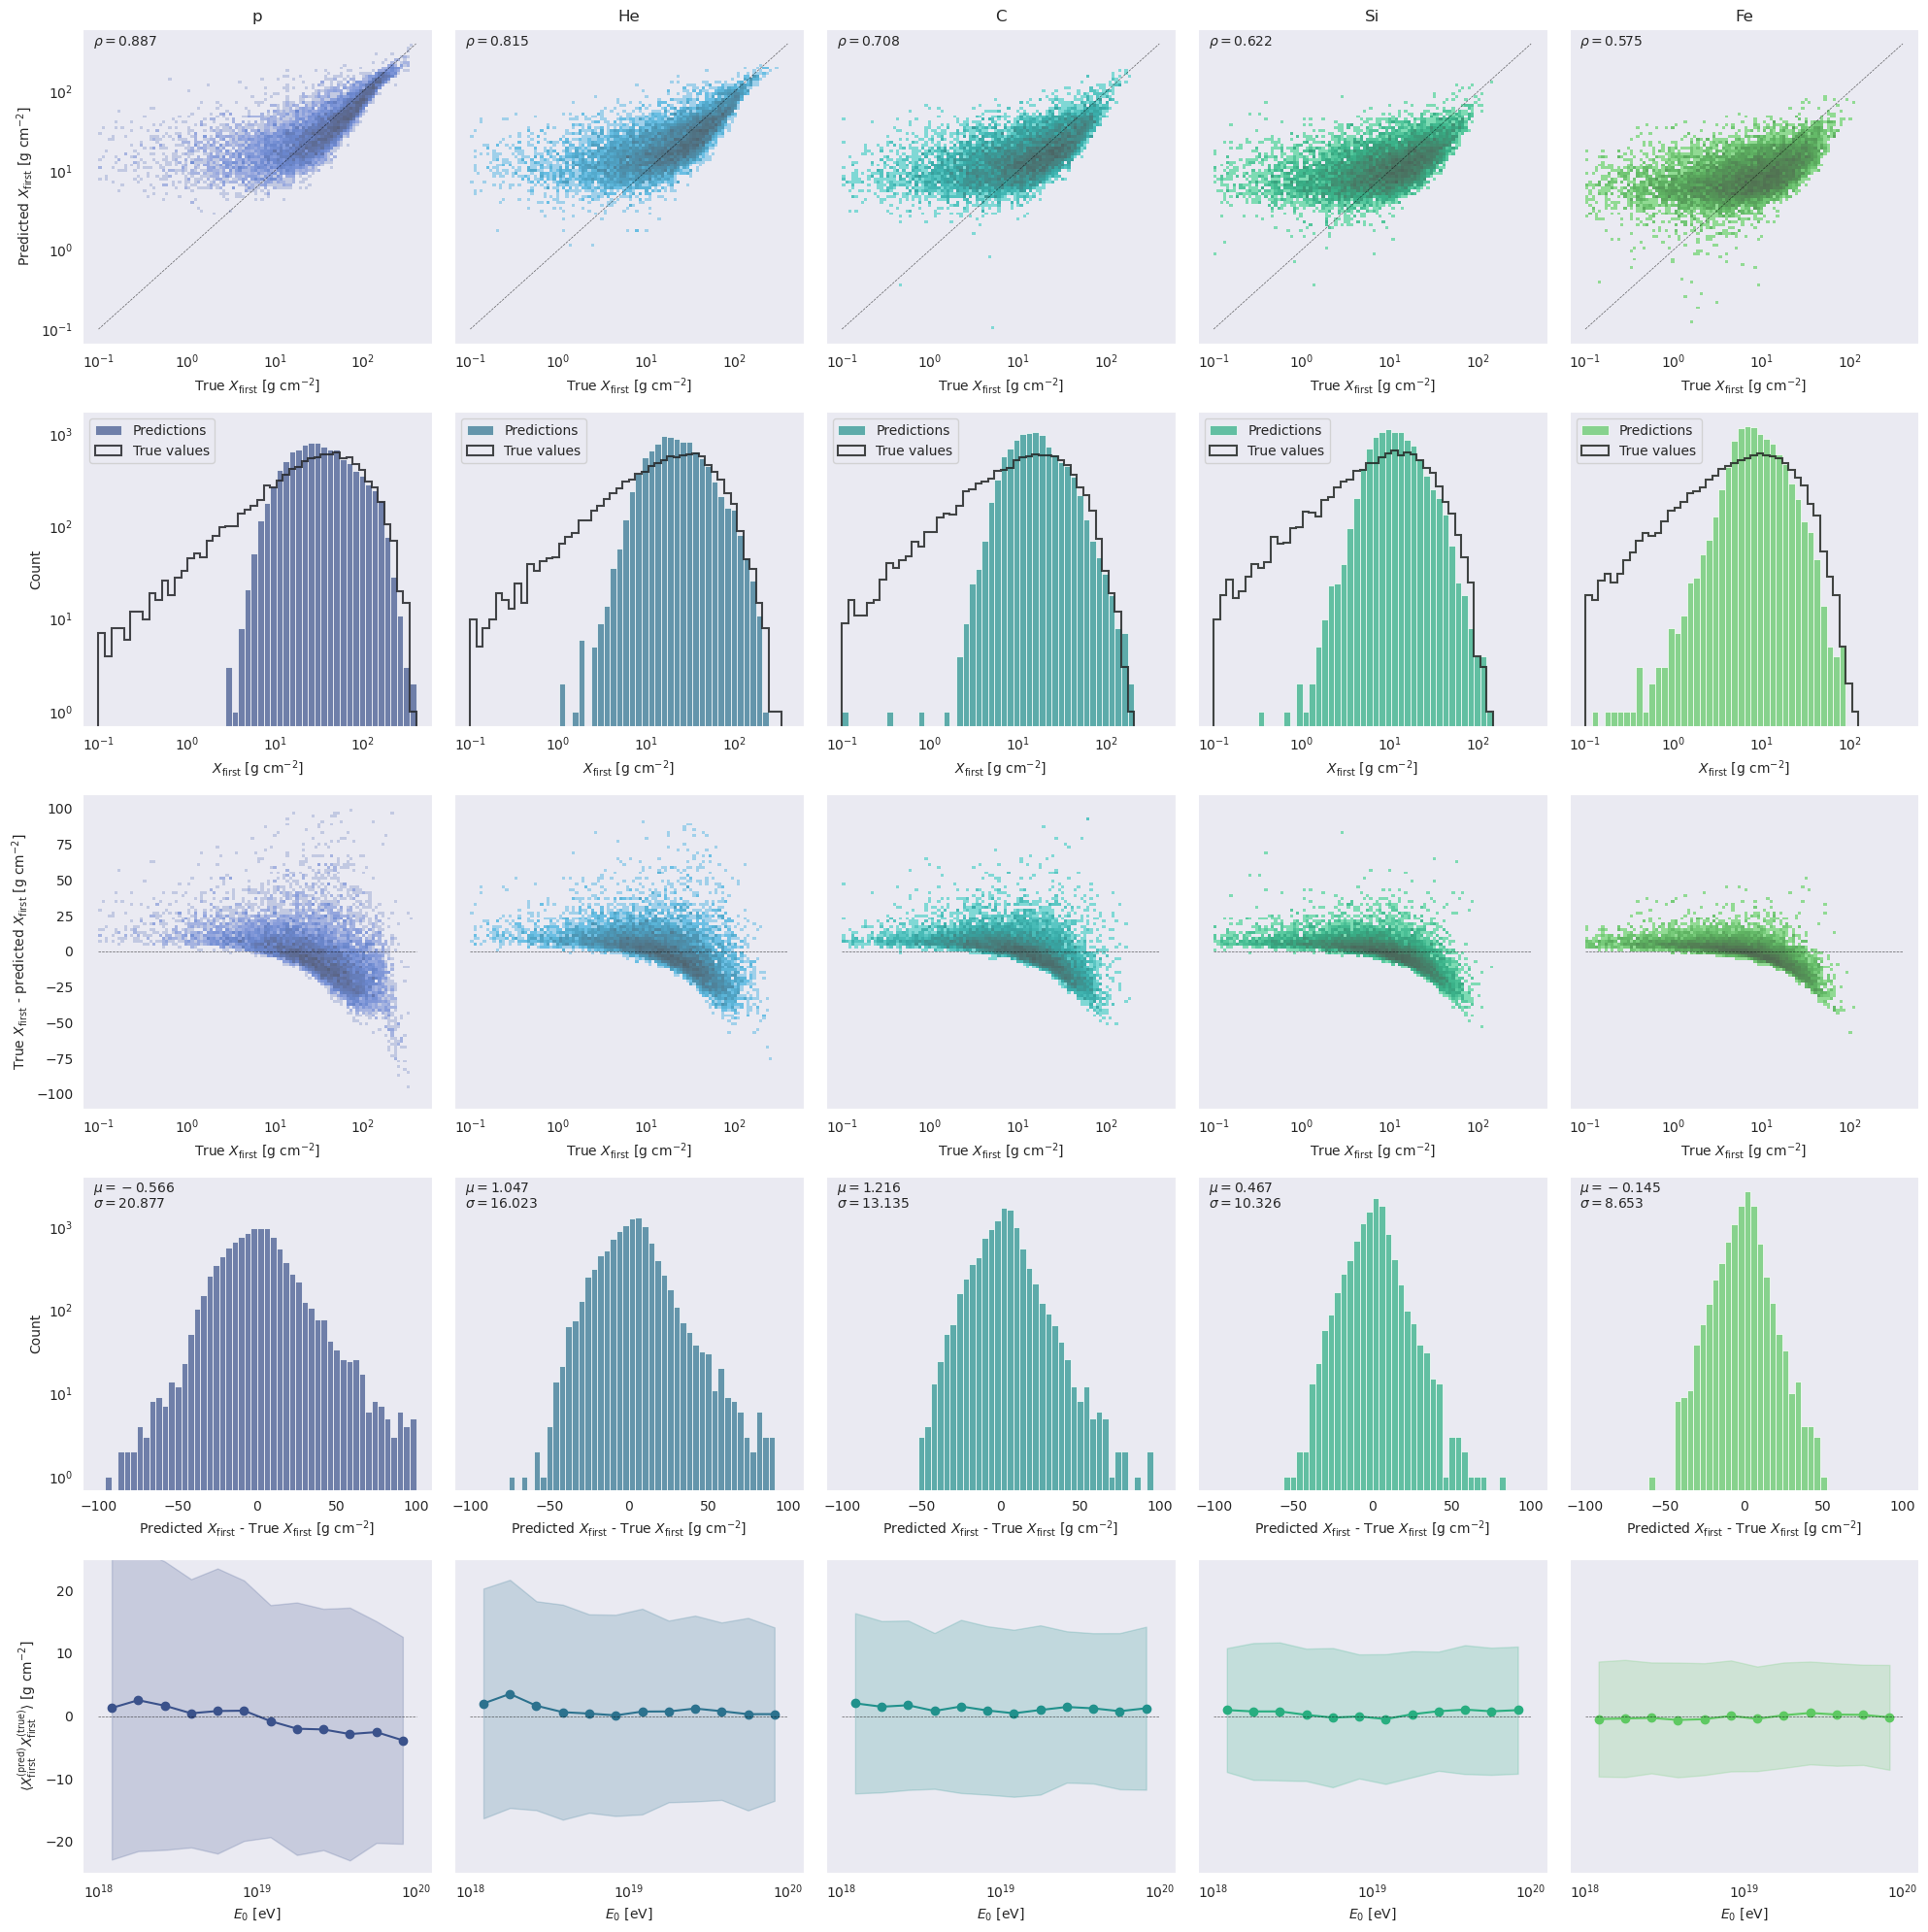

In [6]:
results = model.eval(data, plot = True)